# **Libraries and Dataset**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler,MinMaxScaler

In [2]:
# dataset = pd.read_csv('data/data_market.csv', encoding='latin1')
dataset = pd.read_csv('data/market_cluster.csv', encoding='latin1')

In [3]:
dataset.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


# **Data Cleaning & Preprocessing**

In [4]:
dataset.drop(['Order ID'], axis=1, inplace=True)

In [5]:
dataset.isna().sum()

Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
Cluster          0
dtype: int64

In [6]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

dataset = remove_outliers(dataset, 'Discount')
dataset = remove_outliers(dataset, 'Sales')
dataset = remove_outliers(dataset, 'Profit')

In [7]:
dataset.dropna(inplace=True)

In [8]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32,Medium
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20,Medium
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07,Low
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10,Low
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39,High


<AxesSubplot:xlabel='Cluster', ylabel='Count'>

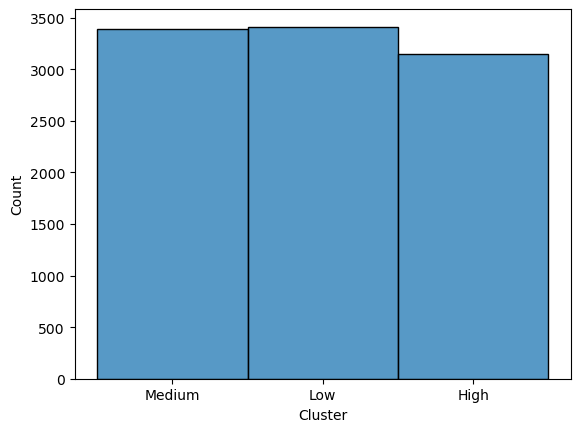

In [9]:
sns.histplot(dataset['Cluster'])

In [10]:
encoder = LabelEncoder()
scaler = StandardScaler()
onehot = OneHotEncoder()
minmaxscaler = MinMaxScaler()

In [11]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"])
dataset["Order Date"] = dataset["Order Date"].dt.month

dataset["Customer Name"] = encoder.fit_transform(dataset["Customer Name"])
dataset["Category"] = encoder.fit_transform(dataset["Category"])
dataset["City"] = encoder.fit_transform(dataset["City"])
dataset["Region"] = encoder.fit_transform(dataset["Region"])
dataset["State"] = encoder.fit_transform(dataset["State"])
dataset["Sub Category"] = encoder.fit_transform(dataset["Sub Category"])

# dataset["Customer Name"] = onehot.fit_transform(dataset["Customer Name"].values.reshape(-1, 1)).toarray()
# dataset["Category"] = onehot.fit_transform(dataset["Category"].values.reshape(-1, 1)).toarray()
# dataset["City"] = onehot.fit_transform(dataset["City"].values.reshape(-1, 1)).toarray()
# dataset["Region"] = onehot.fit_transform(dataset["Region"].values.reshape(-1, 1)).toarray()
# dataset["State"] = onehot.fit_transform(dataset["State"].values.reshape(-1, 1)).toarray()
# dataset["Sub Category"] = onehot.fit_transform(dataset["Sub Category"].values.reshape(-1, 1)).toarray()

dataset["Order Date"] = encoder.fit_transform(dataset["Order Date"])

In [12]:
dataset[["Sales", "Discount", "profit_margin","Profit"]] = scaler.fit_transform(dataset[["Sales", "Discount", "profit_margin","Profit"]])

In [13]:
class_to_numeric = {'Low': 0, 'Medium': 1, 'High': 2}
dataset['Cluster'] = [class_to_numeric[label] for label in dataset['Cluster']]

In [14]:
dataset.head()

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin,Cluster
0,12,5,14,21,10,2,-0.414559,-1.430908,0.124389,0,0.595874,1
1,37,1,13,8,10,3,-1.291968,-0.627370,-0.941183,0,-0.416872,1
2,14,3,0,13,5,4,1.507054,-0.225601,-0.875930,0,-1.514014,0
3,15,4,12,4,9,3,-1.036563,0.310092,-1.196262,0,-1.260827,0
4,28,3,18,12,9,3,1.498367,0.444015,2.315743,0,1.186643,2


# ***Splitting data train & test***

In [15]:
X = dataset.drop(['Cluster','Sub Category','State','profit_margin'],axis=1)
y = dataset['Cluster']

In [16]:
X.head()

,Customer Name,Category,City,Order Date,Region,Sales,Discount,Profit
0,12,5,21,10,2,-0.414559,-1.430908,0.124389
1,37,1,8,10,3,-1.291968,-0.627370,-0.941183
2,14,3,13,5,4,1.507054,-0.225601,-0.875930
3,15,4,4,9,3,-1.036563,0.310092,-1.196262
4,28,3,12,9,3,1.498367,0.444015,2.315743


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
X_train.shape , X_test.shape

((7960, 8), (1991, 8))

In [19]:
y_train.shape , y_test.shape

((7960,), (1991,))

# ***Decision Tree*** *with gini index*

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, RandomizedSearchCV

In [21]:
from sklearn.metrics import accuracy_score

[Text(0.5, 0.875, 'x[7] <= -0.542\ngini = 0.666\nsamples = 7960\nvalue = [2723, 2720, 2517]'),
 Text(0.25, 0.625, 'x[5] <= -0.792\ngini = 0.426\nsamples = 2968\nvalue = [2143, 662, 163]'),
 Text(0.125, 0.375, 'x[7] <= -1.087\ngini = 0.586\nsamples = 1528\nvalue = [748, 617, 163]'),
 Text(0.0625, 0.125, 'gini = 0.083\nsamples = 603\nvalue = [577, 26, 0]'),
 Text(0.1875, 0.125, 'gini = 0.527\nsamples = 925\nvalue = [171, 591, 163]'),
 Text(0.375, 0.375, 'x[7] <= -0.648\ngini = 0.061\nsamples = 1440\nvalue = [1395, 45, 0]'),
 Text(0.3125, 0.125, 'gini = 0.013\nsamples = 1238\nvalue = [1230, 8, 0]'),
 Text(0.4375, 0.125, 'gini = 0.299\nsamples = 202\nvalue = [165, 37, 0]'),
 Text(0.75, 0.625, 'x[7] <= 1.391\ngini = 0.594\nsamples = 4992\nvalue = [580, 2058, 2354]'),
 Text(0.625, 0.375, 'x[5] <= 0.377\ngini = 0.605\nsamples = 4081\nvalue = [580, 1987, 1514]'),
 Text(0.5625, 0.125, 'gini = 0.516\nsamples = 2392\nvalue = [74, 965, 1353]'),
 Text(0.6875, 0.125, 'gini = 0.535\nsamples = 1689\nv

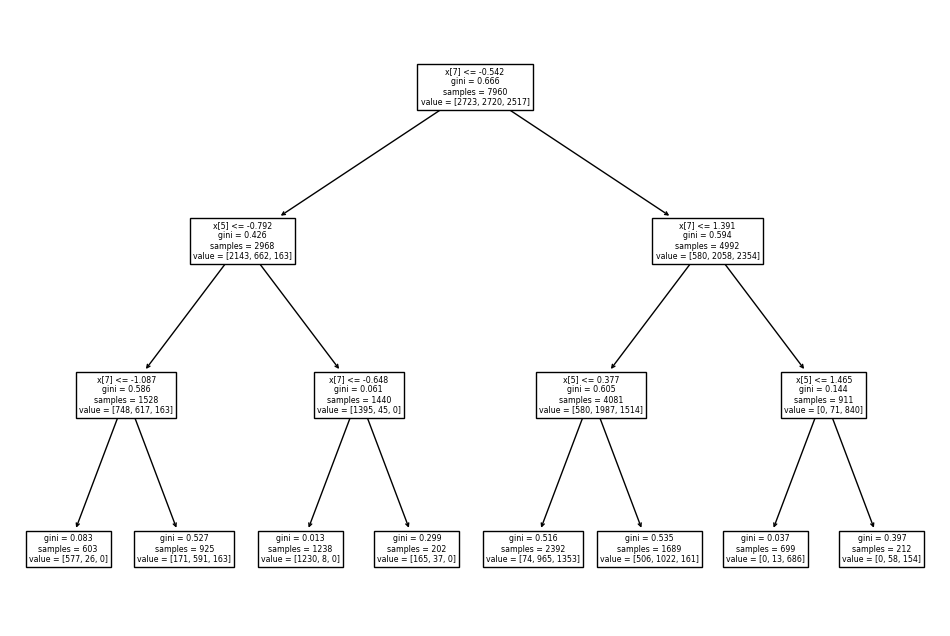

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

# clf_gini = GridSearchCV(estimator=df, param_grid=param_grid, cv=5, scoring='accuracy')
# clf_gini.fit(X_train, y_train)
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [23]:
clf = DecisionTreeClassifier(random_state=42)
params = { 
    "max_depth": range(5,41,5), 
    "criterion": ["gini", "entropy"]
}

In [24]:
model_dt =  GridSearchCV(estimator=clf, #
    param_grid=params,
    cv=2, 
    n_jobs=-1,
    verbose=1
)

In [25]:
model_dt.fit(X_train, y_train) # model fit

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 41, 5)},
             verbose=1)

In [26]:
cv_results_dt = pd.DataFrame(model_dt.cv_results_)
cv_results_dt.sort_values("rank_test_score").head(1)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
9,0.029328,0.003273,0.005254,0.002253,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.972613,0.973869,0.973241,0.000628,1


In [27]:
best_params = model_dt.best_params_
best_maxDepth = best_params['max_depth']
best_Criterion = best_params['criterion']

print(f'The best Max Depth : {best_maxDepth}')
print(f'The best Criterion : {best_Criterion}')

The best Max Depth : 10
The best Criterion : entropy


[Text(0.5950120192307692, 0.9545454545454546, 'x[7] <= -0.12\nentropy = 1.584\nsamples = 7960\nvalue = [2723, 2720, 2517]'),
 Text(0.3144230769230769, 0.8636363636363636, 'x[5] <= -0.792\nentropy = 1.31\nsamples = 4255\nvalue = [2579, 1189, 487]'),
 Text(0.17307692307692307, 0.7727272727272727, 'x[7] <= -0.857\nentropy = 1.56\nsamples = 1968\nvalue = [748, 733, 487]'),
 Text(0.05480769230769231, 0.6818181818181818, 'x[7] <= -1.113\nentropy = 0.848\nsamples = 1012\nvalue = [734, 278, 0]'),
 Text(0.023076923076923078, 0.5909090909090909, 'x[7] <= -1.174\nentropy = 0.162\nsamples = 548\nvalue = [535, 13, 0]'),
 Text(0.015384615384615385, 0.5, 'entropy = 0.0\nsamples = 455\nvalue = [455, 0, 0]'),
 Text(0.03076923076923077, 0.5, 'x[5] <= -1.627\nentropy = 0.584\nsamples = 93\nvalue = [80, 13, 0]'),
 Text(0.023076923076923078, 0.4090909090909091, 'x[7] <= -1.163\nentropy = 0.567\nsamples = 15\nvalue = [2, 13, 0]'),
 Text(0.015384615384615385, 0.3181818181818182, 'x[5] <= -1.691\nentropy = 1.

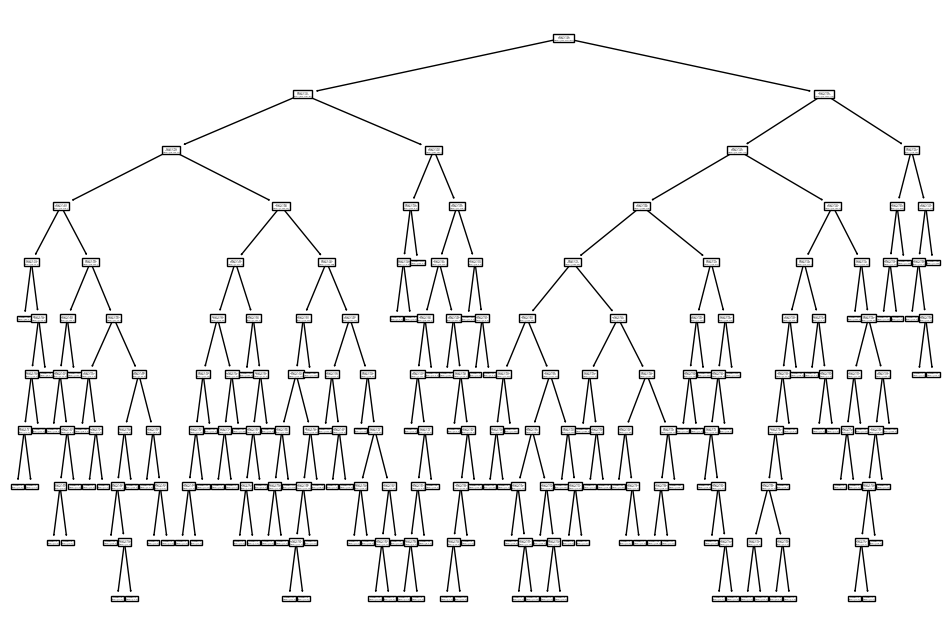

In [28]:
#Using the Decision Tree Classifier with splitting criterion as Gini impurity, the maximum depth of the tree is 3.
clf_gini = DecisionTreeClassifier(criterion=best_Criterion, max_depth=best_maxDepth, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)
#Plot the tree
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [29]:
import joblib
joblib.dump(clf_gini, 'model/decisiontree_model.pkl')

['model/decisiontree_model.pkl']

In [30]:
#Predict the values 
y_pred_gini = clf_gini.predict(X_test)
#Predict the value using X train for accuracy comparision 
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Model accuracy score with criterion gini index: 0.9769
Training-set accuracy score: 0.9991


In [31]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay
from sklearn.metrics import  f1_score

In [32]:
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[682   6   0]
 [ 15 642  16]
 [  0   9 621]]


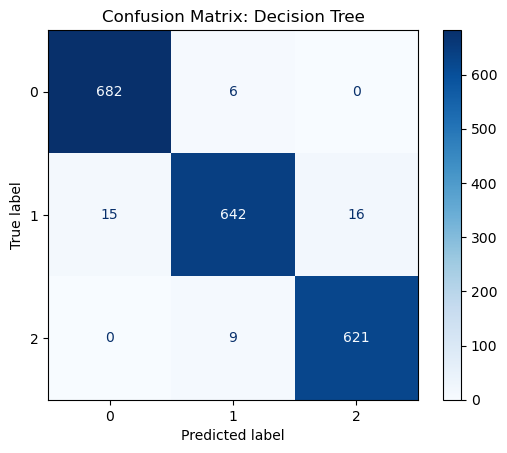

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       688
           1       0.98      0.95      0.97       673
           2       0.97      0.99      0.98       630

    accuracy                           0.98      1991
   macro avg       0.98      0.98      0.98      1991
weighted avg       0.98      0.98      0.98      1991



In [33]:
cm = confusion_matrix(y_test, y_pred_gini)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

print(classification_report(y_test, y_pred_gini))